In [1]:
#!pip install plotly

# Сборный проект

На основании данных из открытых источников необходимо выявить закономерности, определяющие успешность игры. Впоследствии результат работы позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a 
href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a
href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a
href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a
href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a 

## Изучение данных из файла

Импортируем библиотеки, которые пригодятся для выполнения проекта:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('D:\data_proj/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем на экран общую информацию о таблице и о количестве пропусков в каждом столбце:

In [4]:
df.info()
print(df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score     

В датафрейме приведена информация об играх. Всего в таблице 16715 строк.

Описание данных:
* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Названия столбцов не приведены к нижнему регистру, будет необходимо сделать это.
* Данные в столбцах Year_of_Release и Critic_Score представлены типом float. В случае с годом релиза точно необходимо привести к формату int; касательно столбца Critic_Score - изучить, есть ли в нем не целочисленные значения. Если нет, то также заменить на int.
* Также вызывает вопросы тип данных object в столбце User_Score. Необходимо будет изучить его.
* В данных много пропусков. В определенных столбцах - около половины значений пропущены. Возможно, эти пропуски появились по причине того, что раньше понятие "рейтинг игры" не было распространено - на основе первых 10 строк можно увидеть, что пропуски у нас в тех столбцах, где год выпуска был довольно давно. Предстоит разобраться, как с таковыми поступить.

## Предобработка данных

Первым делом приведем названия столбцов нашего датафрейма к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()

Проверим предположение о том, что в столбце critic_score у только целочисленные значения:

In [6]:
print(df['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


Действительно, все значения оказались целочисленными. Потому заменим в этом столбце тип данных. Однако, чтобы это сделать, необходимо понять, что же делать с пропусками. Поменять их на медиану или среднее будет неправильно, но и просто удалить мы их тоже не можем - потеряем половину датасета. 

Потому я предлагаю поменять пропуски на некоторое вымышленное значение. Например, "-100". Если же нам предстоит произвести какие-либо расчеты с данным столбцом, то мы сможем легко определить эти "преобразованные пропуски" и исключить их. Притом отсутсвие пропусков позволит как раз проводить над столбцом.

In [7]:
df['critic_score'] = df['critic_score'].fillna(-100)
df['critic_score'] = df['critic_score'].astype('int')

Теперь разберемся с годом выпуска. В целом, пропусков в этом столбце всего 1,6%. В целом, мы могли бы их удалить, но нельзя исключать, что среди них есть рекордсмены по продажам. Потому также заменим пропуски на вымышленное значение. Пусть таковым будет "1900":

In [8]:
df['year_of_release'] = df['year_of_release'].fillna(1900)
df['year_of_release'] = df['year_of_release'].astype('int')

Теперь изучим столбец user_score и выясним, почему же в нем тип данных object. Для этого выведем уникальные значения этого столбца:

In [9]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Помимо пропусков, есть значение - tbd (To Be Determined). Это значение появилось ввиду малого количества оценок на игру, то есть их недостаточно для полноценного определения рейтинга игры. По сути своей они являются пропусками. Потому и поступим мы с ними аналогичным образом - заменим на вымышленное значение? которое будет выделяться на фоне остальных. Например, "-10".

In [10]:
df['user_score'] = df['user_score'].replace('tbd', '-10')
df['user_score'] = df['user_score'].fillna('-10')

Теперь переведем этот столбец к типу float

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'])

Типы данных исправлены. Продолжим работу с пропусками. Мы видим, что у нас 2 строки с пропусками в названии. Взлянем на них:

In [12]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-100,-10.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-100,-10.0,NaN


Как мы видим, эти строки абсолютно не информативны. Их мы удалим. К тому же, этим действием мы избавимся и от пропусков в столбце genre:

In [13]:
df = df.dropna(subset=['name'])

У нас остались пропуски в столбце rating. Проведем действия, аналогичные тем, что были совершены со столбцом critic_score: Найдем уникальные значения, чтобы ознакомиться со всеми возможными оценками, и подоберем значение для замены пропуска (до это мы брали отрицательное значение максимально допустимой оценки):

In [14]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Согласно документации рейтинга ESRB RP - "Rating Pending"" - рейтинг определяется. По сути, это тоже пропуски. Потому на значение RP мы заменим пропуски интересующего нас столбца:

In [15]:
df['rating'] = df['rating'].fillna('RP')

Проверим, избавились ли мы ото всех пропусков, посмотрев на сумму таковых в каждом столбце:

In [16]:
print(df.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Пропусков в таблице не осталось. Однако проверим предположение о природе появления таковых. Пойдем "от противного" и попытаемся найти строку с пропусками в "рейтингах" и с годом выпуска после 2010 года. Зная, что в столбце user_score "пропуски" имеют значение -10, вызовем:

In [17]:
display(df[(df['year_of_release'] > 2010) & (df['user_score'] == -10)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-100,-10.0,RP
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-100,-10.0,RP
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-100,-10.0,RP
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-100,-10.0,RP
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,-100,-10.0,RP
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100,-10.0,RP
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-100,-10.0,RP
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-100,-10.0,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100,-10.0,RP


Таковых действительно много. Значит, пропуски обусловлены не только годом выпуска игры. Предполагаю, пропуски вдобавок могли появиться из-за того, что данные в датасет были загружены с нескольких источников, и в каких-то из них информация о рейтинге могла быть не представлена.

Добавим в таблицу столбец с суммарными продажами во всех регионах:

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head()) # выведем ее на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100,-10.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100,-10.0,RP,31.38


**ВЫВОД**

В результате выполнения предобработки данных названия столбцов были приведены к нижнему регистру. Также изменили типы данных в столбцах critic_score, year_of_release и user_score на int, int и float соответственно. Пропуски были либо удалены, либо заменены на типовые значения, либо на значения выбивающиеся (с целью идентификации таковых от остальных). В датафрейм добавлен столбец с суммарными продажами.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

<AxesSubplot:xlabel='Год', ylabel='Frequency'>

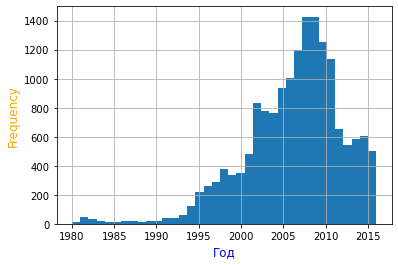

In [19]:
df['year_of_release'].value_counts()
ax = plt.gca()
ax.set_xlabel("Год", fontsize=12, color='blue')
ax.set_ylabel("Количество выпущенных игр", fontsize=12, color='orange')
df['year_of_release'].plot(kind='hist', bins=37, range=(1980,2016), grid=True) 

Как можно заметить, с 2009 года выпускается все меньше компьютерных игр. Предлагаю изучить более делатьно данные о продажах игр с 2010 года.

<AxesSubplot:xlabel='Год', ylabel='Frequency'>

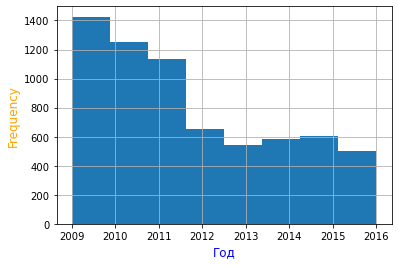

In [20]:
ax = plt.gca()
ax.set_xlabel("Год", fontsize=12, color='blue')
ax.set_ylabel("Количество выпущенных игр", fontsize=12, color='orange')
df['year_of_release'].plot(kind='hist', bins=8, range=(2009,2016), grid=True) 

Возможно, убывание графика связано с тем, что многие перешли на разработку игр/приложений для смартфонов, поскольку затраты на таковые ниже. Можно заметить, что в 2011 году резко сократилось число выпускаемых компьютерных игр. Начиная с 2012 года, число выпускаемых компьютерных игр колеблется в районе 500-600 ед./год

**Выберем платформы с наибольшими суммарными продажами:**

<AxesSubplot:xlabel='platform'>

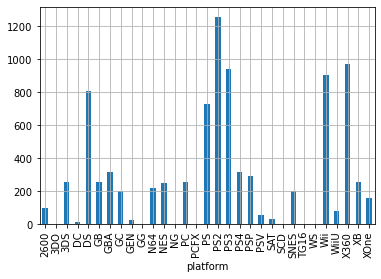

In [21]:
df.groupby('platform')['total_sales'].sum().plot(kind='bar', grid=True)

Сильно заметна группа лидеров по суммарным продажам. Отнесем к таковым те платформы, на которые было продано более 600 млн копий. Получилось, 6 штук, выберем их. Хорошо, что в нашей выборке оказалсь PS трех разных поколений - по ним увидим продолжительность каждого. PS - самая старая из таковых. Была выпущена в 1994 году, потому оставим только данные не позже него:

In [22]:
df_1994=df[df['year_of_release']>=1994] 
platforms_leaders = df_1994.groupby('platform')['total_sales'].sum().sort_values()[-6:].index.tolist()

In [23]:
data = []

for platform in platforms_leaders:
    data.append(
        go.Bar(x=df_1994[df_1994.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=df_1994[df_1994.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи по годам'}
    
fig = go.Figure(data=data, layout=layout)
fig.show()

Можно заметить, что продолжительность "жизни" каждой платформы составила около 10 лет. Как и ожидалось, мы увидели распределения, близкие к распределению Гаусса. Также можно заметить, как разные поколения приставок PS сменяют друг друга. 

Как мы отметили ранее, продажи сферы в целом, сейчас на спаде, начиная с 2009 года. Поскольку продолжительность "жизни" платформы составляет около 10, нам не имеет смысла вкладывать деньги в те, чьи продажи в 2017 упадут до минимальных значений. Потому предлагаю актуальным считать период, как раз, начиная с 2012 года: он совпадает с ситуацией на рынке в целом (без резких перепадов графика), а также вместит в себя интервал, когда потенциально прибыльная платформа выходит на свой пик.

In [24]:
df_2012 = df[df['year_of_release'] > 2011] #Таблица с актуальными данными
platforms_2012 = df_2012.groupby('platform')['total_sales'].sum().sort_values()[-10:].index.tolist() #10 лидеров на актуальном участке
display(platforms_2012)

['DS', 'Wii', 'PSV', 'PC', 'WiiU', 'XOne', '3DS', 'X360', 'PS3', 'PS4']

In [25]:
data = []

for platform in platforms_2012:
    data.append(
        go.Scatter(x=df_2012[df_2012.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=df_2012[df_2012.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи по годам'}
    
fig = go.Figure(data=data, layout=layout)
fig.show()

Как мы видим, продажи по всем платформам падают. Наиболее интересными с точки зрения прибыли являются XOne и PS4: обе платформы только в 2013 году начали свой жизненный цикл, и противостояние "PS vs XBox" должно получиться вызывающим интерес (в предыдущем графике пример предыдущих поколений - XBox 360 и PS4.) в сфере геймеров.

Далее построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам:

(0.0, 2.0)

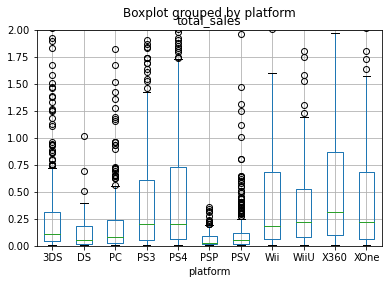

In [26]:
df_2012.boxplot('total_sales', by='platform')
plt.ylim(0,2)

За последние 5 лет наибольшие медианные продажи у X360. Однако, на пятки наступают приставки новых поколений - XOne, PS4 и WiiU (также новое поколоение Wii). Игры на PS3, Wii и X360 в скором времени перестанут выпускаться, и в ближайшей перпеспективе новые поколения данных приставок выйдут вперед.

Обратим внимание, среди всех представленных приставок, были игры, которые "стрельнули" - их продажи вне "ящика с усами".

Далее изучим, как влияют отзывы пользователей и критиков на продажи внутри одной платформы. На данный момент лучше всего дела обстоят у PS4. Ее и возьмем для анализа:

array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

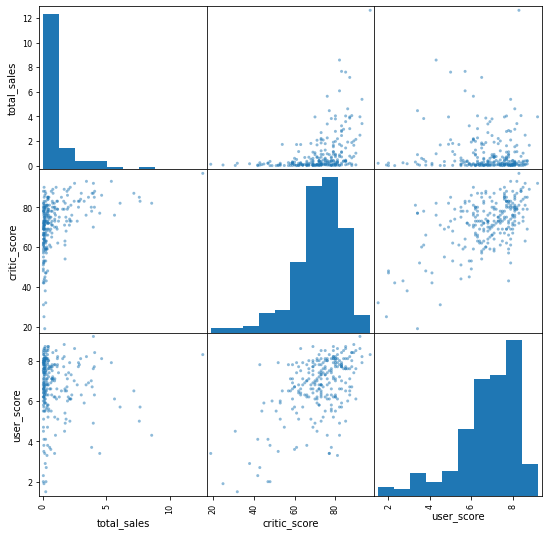

In [27]:
ps4 = df_2012[df_2012['platform']=='PS4']
ps4 = ps4[(ps4['critic_score']!=(-100)) & (ps4['user_score']!=(-10))] #исключим значения оценок, на которые мы меняли пропуски
pd.plotting.scatter_matrix(ps4[['total_sales', 'critic_score', 'user_score']], figsize=(9, 9)) #строим матрицу рассеяния

In [28]:
ps4[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


На основе матрицы рассеяния и рассчитанных коэффициентов Пирсона, мы пришли к выводу: продажи игры прямо зависят от оценки критиков (коэффициент корреляции 0,4) и не зависят от оценок пользователей (коэффициент корреляции нулевой). Теперь проверим, применим ли этот вывод к остальным платформам:

In [29]:
other = df_2012[df_2012['platform']!='PS4'] #исключаем информацию о PS4
other = other[(other['critic_score']!=(-100)) & (other['user_score']!=(-10))] #исключим значения оценок, на которые мы меняли пропуски
other[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.282820,0.009742
critic_score,0.282820,1.000000,0.508452
user_score,0.009742,0.508452,1.000000


В целом, получили схожую картину. Коэффициент Пирсона между оценками экспертов и суммарными продажами положителен и составляет 0,28, что говорит о прямой взаимосвязи данных. Зависмостью между оценками пользователей и суммарными продажами можно принебречь.

Теперь обратим внимание на общее распределение по жанрам:

([<matplotlib.patches.Wedge at 0x222ad3db2e0>,
 [Text(0.47696381414775035, 0.9912141645444895, 'Action'),
  Text(-0.9271404171513369, 0.5919549365318658, 'Adventure'),
  Text(-1.0919797733250323, 0.13259025095764476, 'Fighting'),
  Text(-1.076556164714592, -0.22589117781579762, 'Misc'),
  Text(-0.9608988803638842, -0.5354188469931126, 'Platform'),
  Text(-0.8879437916054485, -0.649273303739912, 'Puzzle'),
  Text(-0.7765462902786913, -0.7790865542764827, 'Racing'),
  Text(-0.27833434872160184, -1.064203923278674, 'Role-Playing'),
  Text(0.43116342420447895, -1.0119773226847866, 'Shooter'),
  Text(0.7463071661231998, -0.8081000023469612, 'Simulation'),
  Text(0.9922502806816959, -0.4748045708363559, 'Sports'),
  Text(1.0967162614101778, -0.08493198430793361, 'Strategy')],
 [Text(0.26016208044422745, 0.5406622715697215, '35.72'),
  Text(-0.50571295480982, 0.32288451083556313, '10.46'),
  Text(-0.595625330904563, 0.07232195506780623, '3.78'),
  Text(-0.5872124534806865, -0.1232133697177077

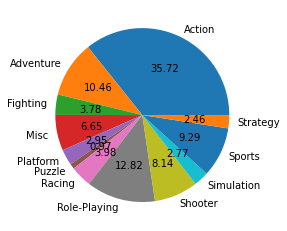

In [30]:
plt.pie(x=df_2012.groupby('genre')['genre'].count(), labels=df_2012.groupby('genre')['genre'].count().index, autopct="%.2f")

Самым широко представленным с отрывом является жанр Action. Второе место у Role-Playing. Следом с близкими значениями идут  Adventure, Sports, Shooter, Misc. Посмотрим, как обстоят дела с продажами в зависимости от жанра:

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


([<matplotlib.patches.Wedge at 0x222ad462820>,
 [Text(0.6326458750291509, 0.899866210504984, 'Action'),
  Text(-0.9298029801081938, 0.5877639136438386, 'Shooter'),
  Text(-0.9563309561233106, -0.5435357415665272, 'Role-Playing'),
  Text(-0.26360328911194947, -1.067948175694571, 'Sports'),
  Text(0.3626294863995826, -1.0385084764187411, 'Misc'),
  Text(0.6684325085210389, -0.8736120314832388, 'Platform'),
  Text(0.8628827904627661, -0.6822267144602228, 'Racing'),
  Text(0.9875114327276391, -0.4845835018159469, 'Fighting'),
  Text(1.0561546883601118, -0.307469143581848, 'Simulation'),
  Text(1.0887563764262855, -0.15687432164348875, 'Adventure'),
  Text(1.0986135799195862, -0.05521052450639659, 'Strategy'),
  Text(1.0999379652533312, -0.011682148533633542, 'Puzzle')],
 [Text(0.3450795681977186, 0.4908361148209003, '30.50'),
  Text(-0.5071652618771966, 0.3205984983511847, '21.07'),
  Text(-0.5216350669763512, -0.2964740408544693, '13.33'),
  Text(-0.14378361224288153, -0.5825171867424932,

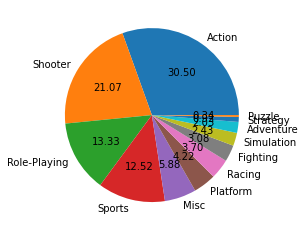

In [31]:
genres = df_2012.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genres)
plt.pie(x=genres, labels=genres.index, autopct="%.2f")

Лидер по-прежнему Action. Самый широко представленный жанр имеет наибольшие продажи - звучит вполне логично. Хорошо продажи идут у жанков: Shooter, Sports, Platform. Процентная доля продаж у них выше, чем процентная доля их представительства (особенно у Shooter, см. график выше). Плохо дела с продажами обстоят у игр жанра Adventure (всего игр такого жанра - 7,8%, а продажи ниже 2,5% от числа всех продаж), Puzzle (0,97% против 0,34), Strategy(2,46% против 0,92). В остальных случаях процентные доли на первом и втором графиках отличаются не столь явно.

**ВЫВОД**

Результатом выполнения исследовательского анализа данных приведены следующие выводы:
* Сфера компьютерных игра на спаде, начиная с 2009 года;
* Жизненный цикл приставки одного поколения составляет 10 лет. Продажи игр на конкретную приставку представляют собой нормальное распределение;
* Определен актуальный период, на основе которого проводился дальнейшей анализ;
* В качестве потенциально прибыльных платформ были выбраны XOne и PS4;
* Изучены медианные продажи каждой приставки;
* Продажи прямо зависят от оценок критиков и не зависят от оценок пользователей
* Наиболее широко представленный жанр как с точки количества игр, так и их продаж - Action. Стоит отметить Shooters: в процентном отношении относительно всего рынка данный жанр занимает второе место по продажам при лишь шестом по количеству представленных игр.

## Портрет пользователя каждого региона

Узнаем самые популярные платформы для каждого региона:

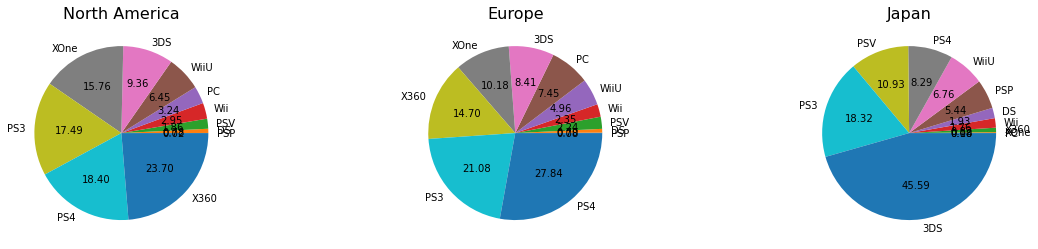

In [32]:
na_index = df_2012.groupby('platform')['na_sales'].sum().sort_values().index
na_values = df_2012.groupby('platform')['na_sales'].sum().sort_values()
eu_index = df_2012.groupby('platform')['eu_sales'].sum().sort_values().index
eu_values = df_2012.groupby('platform')['eu_sales'].sum().sort_values()
jp_index = df_2012.groupby('platform')['jp_sales'].sum().sort_values().index
jp_values = df_2012.groupby('platform')['jp_sales'].sum().sort_values()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.pie(x=na_values, labels=na_index, autopct="%.2f")
ax1.set_title("North America", fontsize=16)

ax2.pie(x=eu_values, labels=eu_index, autopct="%.2f")
ax2.set_title("Europe", fontsize=16)

ax3.pie(x=jp_values, labels=jp_index, autopct="%.2f")
ax3.set_title("Japan", fontsize=16)

plt.show()
#plt.pie(x=df_2009.groupby('platform')['na_sales'].sum(), labels=df_2009.groupby('platform')['na_sales'].sum().index, autopct="%.2f")

Самыми популярными в Северной Америке оказались: X360 (23,70% продаж игр от общего количества продаж в регионе), PS4 (18,40%), XOne (15,76%), 3DS (9,36%), WiiU (6,45%).

В Европе же более четверти продаж за PS4 (27,84%), следом PS3 (21,08%), X360 (14,70), XOne (10,18), 3DS (8,41%)

В Японии уверенное лидерство за 3DS (45,59%), дальше идет PS3 (18,32%), PSV (10,93%), PS4 (8,29%), WiiU (6,76)

Изучим жанровые предпочтения жителей каждого региона:

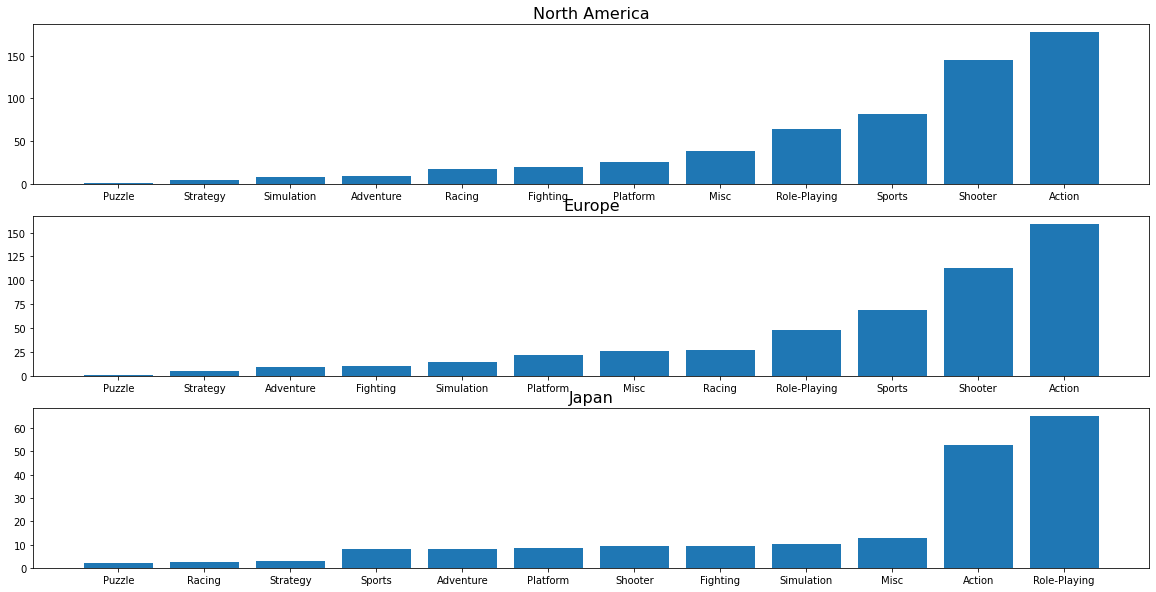

In [33]:
na_index = df_2012.groupby('genre')['na_sales'].sum().sort_values().index.tolist()
na_values = df_2012.groupby('genre')['na_sales'].sum().sort_values()
eu_index = df_2012.groupby('genre')['eu_sales'].sum().sort_values().index.tolist()
eu_values = df_2012.groupby('genre')['eu_sales'].sum().sort_values()
jp_index = df_2012.groupby('genre')['jp_sales'].sum().sort_values().index.tolist()
jp_values = df_2012.groupby('genre')['jp_sales'].sum().sort_values()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))

ax1.bar(na_index, na_values)
ax1.set_title("North America", fontsize=16)

ax2.bar(eu_index, eu_values)
ax2.set_title("Europe", fontsize=16)

ax3.bar(jp_index, jp_values)
ax3.set_title("Japan", fontsize=16)

plt.show()

В Северной Америке больше всего любят Action, потом Shooter, Sports, Role-Playing, Misc. Идентичная картина в Европе, меняется только последняя позиция ТОП-5: вссто Misc - Racing

В Японии же лидерство у жанра Role-Playing, следом за которым идут Action, Misc, Simulation, Fighting.

Теперь изучим, влияет ли рейтинг ESRB на продажи в зависимости от региона:

Согласно документации ESRB, игры разделяются на следующие категории:
* **EC** («Early childhood») — «Для детей младшего возраста»
* **E** («Everyone») — «Для всех»
* **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»
* **T** («Teen») — «Подросткам»
* **M** («Mature») — «Для взрослых»
* **RP** («Rating Pending») — «Рейтинг ожидается»

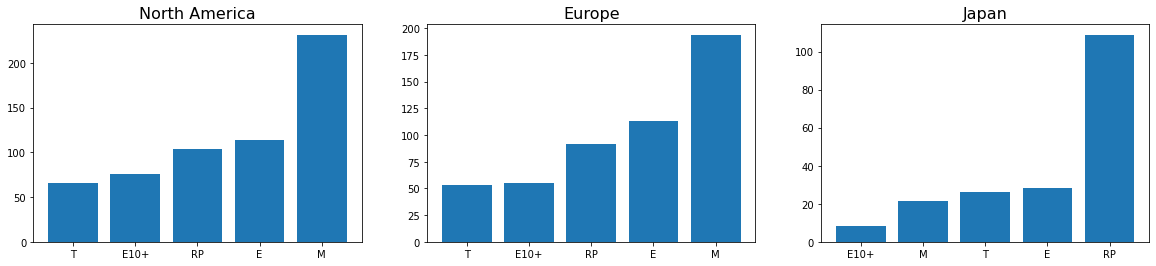

In [34]:
na_index = df_2012.groupby('rating')['na_sales'].sum().sort_values().index.tolist()
na_values = df_2012.groupby('rating')['na_sales'].sum().sort_values()
eu_index = df_2012.groupby('rating')['eu_sales'].sum().sort_values().index.tolist()
eu_values = df_2012.groupby('rating')['eu_sales'].sum().sort_values()
jp_index = df_2012.groupby('rating')['jp_sales'].sum().sort_values().index.tolist()
jp_values = df_2012.groupby('rating')['jp_sales'].sum().sort_values()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.bar(na_index, na_values)
ax1.set_title("North America", fontsize=16)

ax2.bar(eu_index, eu_values)
ax2.set_title("Europe", fontsize=16)

ax3.bar(jp_index, jp_values)
ax3.set_title("Japan", fontsize=16)

plt.show()

Получилась схожая с предыдущим пунктом картина: 

В Северной Америке и Европе идентичные продажи в зависимости от рейтинга ESRB. Самыми популярными оказались игры для "взрослых". Наиболее вероятно, что подавляющее большинство игр жанров Action и Shooter, популярных в этих регионах, как раз имеют рейтинг M. Далее идут игры "для всех", "для подростков" и "для всех от 10 лет". Ожидаемо, категория игр "Для детей младшего возраста" имет на последнем месте.

В Японии лидерство у игр c неопределенным рейтингом. Возможно, это связано с популярностью там игр отечественного производителя, который ERSB не аттестует. Следом, в отличие от Европы и Северной Америки, идут игры "для всех". Думаю, многие Role-Playing, особенно популярные в стране восходящего солнца, в большинстве своем обладают рейтингом E. Следом расположились игры "для подростков", "для взрослых" и "для всех от 10 лет". Последнее место неизменно у категории EC.

**ВЫВОД**

Нами были составлены портреты пользователей каждого региона.

Североамериканский и европейский пользователи схожи между собой: предпочитают игры одних и тех же жанров и обладают близкими распределениями продаж в зависимости от рейтинга ESRB. Отличия есть в наиболее популярных платформах для игр.

Японский пользователь не похож на упомянутых западных. Он отличается предпочтениями как по жанрам и рейтингу ESRB, так и по плаформам, на которых играет. Мне кажется, это связано с культурными различиями между пользователями: европейцы и североамериканцы похожи не только в предпочтениях по компьютерным играм (если говорить очень грубо, то "вторые появились из первых" вследствие колонизации Северной Америки, которая европейцами и проводилась). Япония же очень закрытая страна и не просто так считается одной из самых сложных стран для переезда в нее - ее культура сильно отличается от культуры любой другой страны.

## Проверка гипотез

**ГИПОТЕЗА 1**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

* **Нулевая** - средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**
* **Альтернативная** - средние пользовательские рейтинги платформ Xbox One и PC **различаются**

Xbox One только недавно появилась, когда игры на PC уже давно. Потому будем изучать таблицу с данными не только за актуальный период, а за все время. Притом исключим значения, на которые мы меняли пропуски:

In [35]:
df = df[df['user_score']!=(-10)]

Перед проверкой гипотез следует проверить дисперсии выборок, чтобы корректно определить атрибут equal_val в Т–тесте.
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.

In [36]:
x_one = df[df['platform']=='XOne']['user_score'] #выборка оценок пользователей XBox One
pc = df[df['platform']=='PC']['user_score'] #выборка оценок пользователей PC

XOne. Средняя оценка пользователя: 6.52142857142857
XOne. Дисперсия: 1.9069968429360702
XOne. Стандартное отклонение: 1.3809405645921442
PC. Средняя оценка пользователя: 7.062467532467546
PC. Дисперсия: 2.3407871413372
PC. Стандартное отклонение: 1.529963117639507


<AxesSubplot:title={'center':'Распределение пользовательского рейтинга'}, xlabel='Оценка', ylabel='Frequency'>

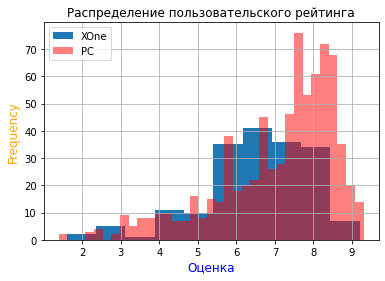

In [37]:
x_one.plot(kind='hist', bins=10, label='XOne', legend=True, grid = True)
ax = plt.gca()
ax.set_xlabel("Оценка", fontsize=12, color='blue')
ax.set_ylabel("Частота", fontsize=12, color='orange')
print('XOne. Средняя оценка пользователя:', np.mean(x_one))
print('XOne. Дисперсия:', np.var(x_one, ddof=1))
print('XOne. Стандартное отклонение:', np.std(x_one, ddof=1))
print('PC. Средняя оценка пользователя:', np.mean(pc))
print('PC. Дисперсия:', np.var(pc, ddof=1))
print('PC. Стандартное отклонение:', np.std(pc, ddof=1))
pc.plot(kind='hist', bins=35, title = 'Распределение пользовательского рейтинга', color = 'red', alpha=0.5, label='PC', legend=True, grid = True)

Дисперсии получились разными, потому добавим equal_var=False и проведем Т-тест

In [38]:
alpha = 0.05 #зададим критический уровень значимости
result = st.ttest_ind(x_one, pc, equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве среднего пользовательского рейтинга XOne и PC отвергается. Альтернативная гипотеза не отвергается.

**ГИПОТЕЗА 2**

Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы:

* **Нулевая** - средние пользовательские рейтинги жанров Action и Sports **одинаковые**
* **Альтернативная** - средние пользовательские рейтинги жанров Action и Sports **различаются**


In [39]:
action = df[df['genre']=='Action']['user_score']
sports = df[df['genre']=='Sports']['user_score']

Проведем дейтсвия, аналогичные проверке первой гипотезы:

Action. Средняя оценка пользователя: 7.054043715846988
Action. Дисперсия: 2.031746898033191
Action. Стандартное отклонение: 1.4253935940761033
Sports. Средняя оценка пользователя: 6.961196736174073
Sports. Дисперсия: 2.5965147189730073
Sports. Стандартное отклонение: 1.6113704474679331


<AxesSubplot:title={'center':'Распределение пользовательского рейтинга'}, xlabel='Оценка', ylabel='Frequency'>

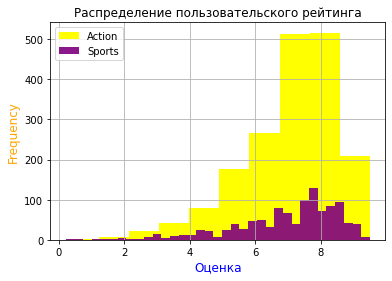

In [40]:
action.plot(kind='hist', bins=10, label='Action', color='yellow', legend=True, grid = True)
ax = plt.gca()
ax.set_xlabel("Оценка", fontsize=12, color='blue')
ax.set_ylabel("Частота", fontsize=12, color='orange')
print('Action. Средняя оценка пользователя:', np.mean(action))
print('Action. Дисперсия:', np.var(action, ddof=1))
print('Action. Стандартное отклонение:', np.std(action, ddof=1))
print('Sports. Средняя оценка пользователя:', np.mean(sports))
print('Sports. Дисперсия:', np.var(sports, ddof=1))
print('Sports. Стандартное отклонение:', np.std(sports, ddof=1))
sports.plot(kind='hist', bins=35, title = 'Распределение пользовательского рейтинга', color = 'purple', alpha=0.9, label='Sports', legend=True, grid = True)

In [41]:
alpha = 0.05 #зададим критический уровень значимости
result = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза о равенстве пользовательских рейтингов жанров Action и Sports не отвергается. Альтернативная же отвергается.

**ВЫВОД**

В результате проверки гипотез была отвергнута нулевая гипотеза о равенстве средних пользовательских рейтингов платформ XOne и PC. Альтернативная ей гипотеза не отвергнута.

Гипотеза о равенстве средних пользовательских оценок жанров Action и Sports не отвергнута.

# Общий вывод

Ознакомившись с данными и предобратов их, мы приступили к исследовательскому анализу данных, в результате которого были получены необходимые знания о самой сфере и взаимосвязи ее составляющих:
* Сфера компьютерных игра на спаде, начиная с 2009 года;
* Жизненный цикл приставки одного поколения составляет 10 лет. Продажи игр на конкретную приставку представляют собой нормальное распределение;
* Определен актуальный период, на основе которого проводился дальнейшей анализ (с 2012 года);
* В качестве потенциально прибыльных платформ были выбраны XOne и PS4;
* Изучены медианные продажи каждой приставки;
* Продажи прямо зависят от оценок критиков и не зависят от оценок пользователей
* Наиболее широко представленный жанр как с точки количества игр, так и их продаж - Action. Стоит отметить Shooters: в процентном отношении относительно всего рынка данный жанр занимает второе место по продажам при лишь шестом по количеству представленных игр.

Также был составлен портрет пользователя каждого из представленных регионов. Пользователи из Европы и Северной Америки обладают схожими предпочтениями, японцы же сильно отличаются от них буквально во всем. Я думаю, эти различия можно объяснить, в первую очередь, "культурным барьером" между Японией и любой другой страной. В ту же очередь схожесть предпочтений в области компьютерных игр североамериканцев и европейцев объяснима схожестью культур 

В завершении были проверены гипотез:
* Гипотеза о равенстве средних пользовательских рейтингов платформ XOne и PC отвергнута.
* Гипотеза о равенстве средних пользовательских оценок жанров Action и Sports не отвергнута.